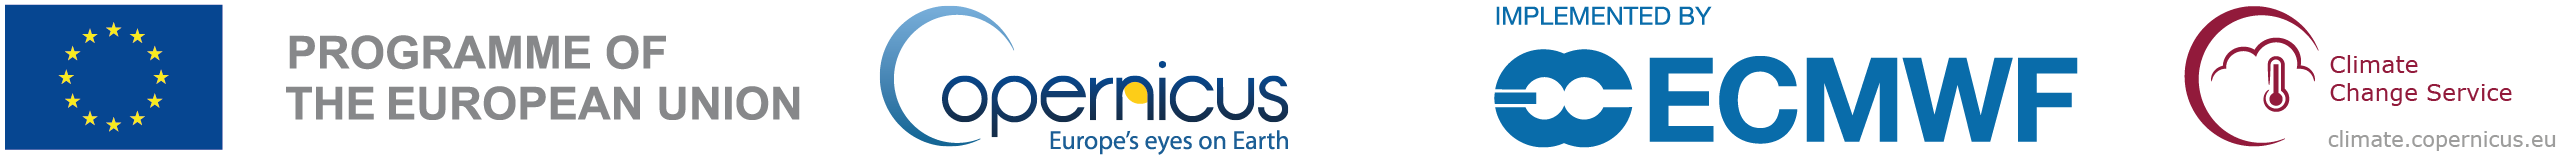

<br>

# Contextualising the Pixel - the Copernicus Climate Change Service (C3S)

Having been captured by the satellite, validated and turned into a Climate Data Record (CDR), the pixel arrives at the [European Centre for Medium-Range Weather Forecasts (ECMWF)](https://www.ecmwf.int/) to be further guided on its journey by the [Copernicus Climate Change Service (C3S)](https://climate.copernicus.eu/). C3S will escort the pixel through its process of integration and assimilation into operational and quality assured products to help it discover its overall climate context. It will ensure the pixel reaches maturity and wisdom before "passing the baton" to other entities who will further shape its development and specialisation. Or it may already accompany it to the doorsteps of the most influential decision makers. C3S helps the pixel achieve its full potential in making the greatest societal impact.

## The pixel arrives at the Climate Data Store (CDS)

Let us look in more detail at this particular stage of the Pixel's journey. We begin at the [Climate Data Store (CDS)](https://cds.climate.copernicus.eu/) of C3S. The pixel becomes one of petabytes of quality assured and well documented global and regional datasets of a great number of Essential Climate Variables (ECVs). It may reside as a CDR derived from satellite or in-situ observations, or in gridded "maps without gaps" of observations assimilated into state of the art models ("reanalyses"), and used to provide invaluable climatologies from past decades. It may be a prediction of above/below average conditions for the next months as a seasonal forecast, or projected into future decades with its behaviour hypothesised under different globally defined scenarious (SSP). Whichever the product, the pixel will freely and openly lend its services to whomever wishes to access it. This leads us to our first task...

<div class="alert alert-block alert-success">
<b>ACTIVITY</b>: <br>
    Explore the wealth of quality assured climate data freely available on the <a href="https://cds.climate.copernicus.eu/">Climate Data Store (CDS)</a>! Search using keywords or through the filters on the left panel. Discover the types of data available, including variables over land, sea, atmosphere. Find out their temporal and spatial resolution, units, and any other information available. Can you comment on the variety of data that exists over our pixel?</div>

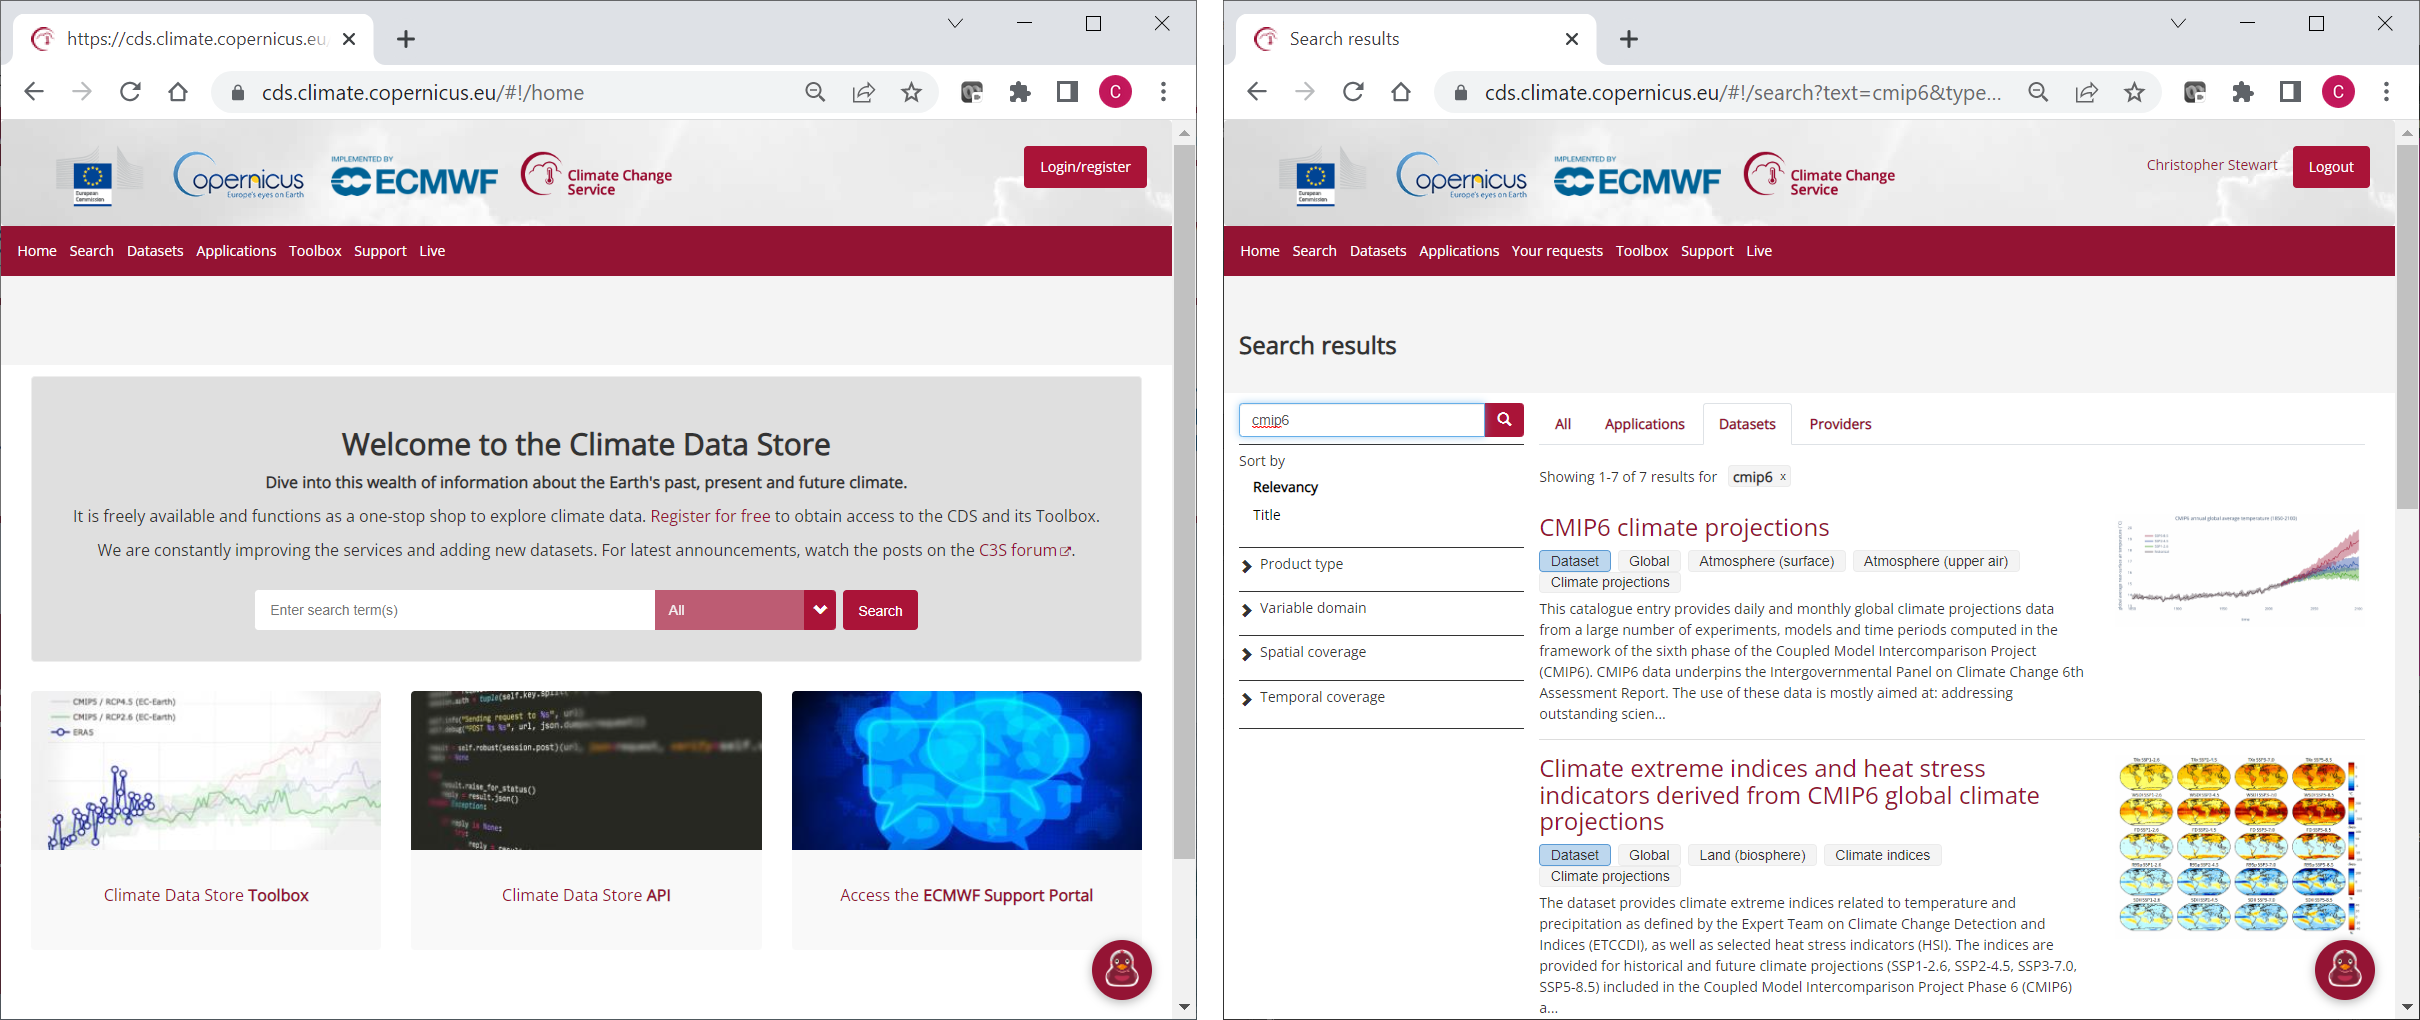

## The pixel is projected in time, according to different scenarios

We will focus now on analysing how our pixel may behave in an extended time period according to various different scenarios. This kind of analysis can aid decision makers in identifying suitable courses of action to mitigate or adapt to climate change. C3S makes available climate projections data from a large number of experiments, models and time periods computed in the framework of the sixth phase of the Coupled Model Intercomparison Project (CMIP6).

<div class="alert alert-block alert-success">
<b>ACTIVITY</b>: <br>
    Discover the <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=overview">CMIP6 data available through the CDS</a>. Read the information in the "Overview" tab, have a quick glance at the topics and wealth of information present in the "Documentation" tab, then explore the download options in the "Data" tab.</div>

CMIP6 data is freely available to download from the CDS. For this exercise we will use a sample of this data, which can be found here: `./data/cmip6_processed_data.nc`. 

### Import libraries

Before we can open and analyse this dataset, we will need to import the various libraries we will use:

In [1]:
# Libraries for working with multidimensional arrays
import numpy as np
import pandas as pd
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

### Read and inspect CMIP6 data sample

We will now read our CMIP6 data sample into an Xarray Dataset:

In [2]:
# Create Xarray Dataset
ds = xr.open_dataset('./data/cmip6_processed_data.nc')
ds

<xarray.Dataset>
Dimensions:     (year: 251, model: 9, experiment: 4)
Coordinates:
  * year        (year) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
    depth       (model) float64 ...
  * model       (model) object 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'NorESM2-MM'
  * experiment  (experiment) object 'historical' 'ssp126' 'ssp245' 'ssp585'
Data variables:
    mrsos       (experiment, model, year) float64 ...

As you can see, this dataset includes three dimensions (**year**, **model** and **experiment**), and one data variable **mrsos**. This data variable is Moisture in Upper Portion of Soil Column, which is the mass of water in all phases in the upper 10cm of the soil layer in units of kg per m-2.

#### Climate Models

Note in the "model" dimension that we have inlcuded a small subset of nine models in this dataset. Climate models are one of the primary means for scientists to understand how the climate has changed in the past and may change in the future. These models simulate the physics, chemistry and biology of the atmosphere, land and oceans in great detail, and require some of the largest supercomputers in the world to generate their climate projections. The models we have included here are from various contributions around the world, inlcuding Europe, North America, Asia and Australasia. See [here for more information about the CMIP6 climate models](https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=doc).

In [15]:
models = ['access_cm2', 'bcc_csm2_mr', 'canesm5_canoe', 'cmcc_esm2', 
          'miroc6', 'noresm2_mm', 'cnrm_esm2_1', 'ec_earth3_veg_lr', 
          'mpi_esm1_2_lr']

#### Experiments

The "experiments" refer to different pathways of future climate forcing, typically covering the period up to 2100, but sometimes beyond. In this data sample we include three possible future scenarios: 'SSP 126', 'SSP 245' and 'SSP 585'. Historical experiments typically covering the period from 1850, where modern climate observations exist, are also included for each model. These show how the models perform for the past climate and can be used as a reference period for comparison with scenario runs for the future. See the [full documentation here for more details](https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=doc).

In [16]:
experiments = ['historical', 'ssp126', 'ssp245', 'ssp585']

### Plot CMIP6 data sample

We will now visualise this CMIP6 data sample as a plot showing the variation of moisture in the upper portion of the soil column over time, according to different models and experiments. 

Given that we have nine models that each provide competing analyses of how the pixel may be projected in time, a way to visualise this is to view statistical properties of this ensemble of data. We will calculate upper and lower quantiles, together with the mean of all models, to have an idea of the consensus and uncertainties of these models for each scenario.

#### Calculate quantiles and median of model ensemble

In [19]:
data_90 = data.quantile(0.9, dim='model') # 90th quantile (near to upper limit)
data_10 = data.quantile(0.1, dim='model') # 10th quantile (near to lower limit)
data_50 = data.mean(dim='model') # Mean

C:\Users\cxcs\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


> **Note:** The warning message is due to the presence of NaN (Not a Number) data given that the historical and scenario datasets represent only parts (historical and future respectively) of the entire time series. As these two datasets have been merged, NaN values will exist (e.g. there will be no data for the historical experiment for the future period).

#### Create plot

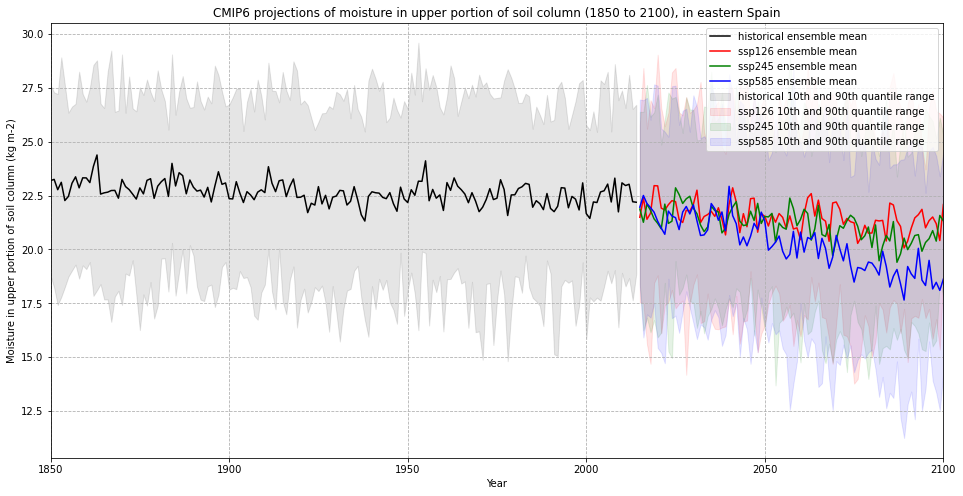

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

colours = ['black','red','green','blue']
for i in np.arange(len(experiments)):
    ax.plot(data_50.year, data_50[i,:], color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} ensemble mean')
    ax.fill_between(data_50.year, data_90[i,:], data_10[i,:], alpha=0.1, color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} 10th and 90th quantile range')

ax.set_xlim(1850,2100)
ax.set_title('CMIP6 projections of moisture in upper portion of soil column (1850 to 2100), in eastern Spain')
ax.set_ylabel('Moisture in upper portion of soil column (kg m-2)')
ax.set_xlabel('Year')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='--')

fig.savefig(f'./CMIP6_soil_moisture.png')

Notice how the models suggest, for the period 1850 to present, a very gradual decrease in the moisture in the upper portion of the soil column in the location of our pixel. In future decades on the other hand, even the most "optimistic" scenarios suggest a sharper decline, while the most "pessimistic" (SSP585) outlines a progressively greater decline over time.

## Further evolutions of the pixel

The analysis of the pixel we have carried out so far has benefitted from significant global modelling and collaboration activities to provide data in support to climate change related decision making. We have seen how this data can be turned into information in the form of graphical charts. C3S goes even further to provide ready to use information products which can be even more easily generated with the help of online applications, requiring no programming. These are [available on CDS](https://cds.climate.copernicus.eu/cdsapp#!/search?type=application).

<div class="alert alert-block alert-success">
<b>ACTIVITY</b>: <br>
    Explore the <a href="https://cds.climate.copernicus.eu/cdsapp#!/search?type=application">applications available on the CDS</a>. In particular, experiment with the <a href="https://cds.climate.copernicus.eu/cdsapp#!/software/app-satellite-soil-moisture?tab=app">Satellite Soil Moisture</a> application. In the 1992 to 2019 climatology for our pixel, in which month is the satellite derived soil moisture at its lowest level?</div>

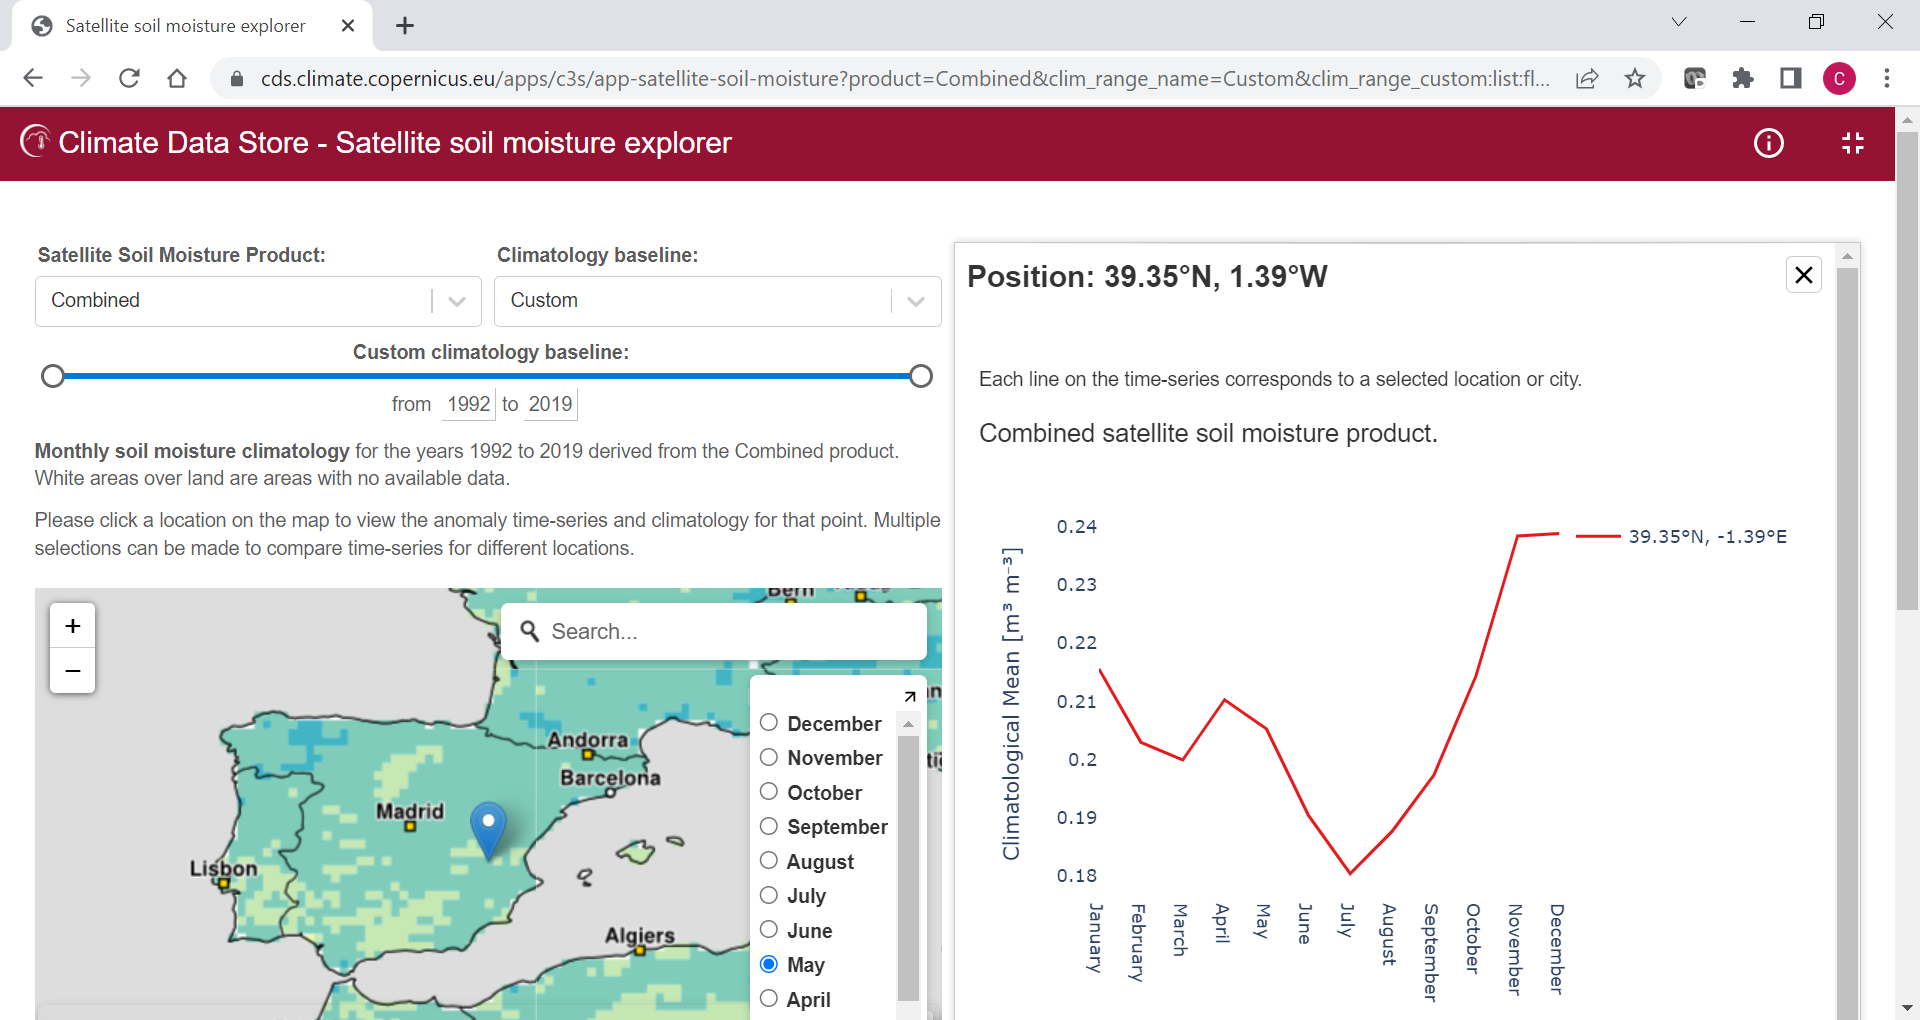

<br>